<a href="https://colab.research.google.com/github/Gusfer11/Presentacion/blob/main/Calidadaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Importación de librerías

from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

**CARGA DE LOS DATASET**

In [3]:
uploaded = files.upload()

Saving Estacion2_2019.csv to Estacion2_2019.csv
Saving Estacion2_2020.csv to Estacion2_2020.csv
Saving Estacion2_2021.csv to Estacion2_2021.csv
Saving Estacion3_2019.csv to Estacion3_2019.csv
Saving Estacion3_2020.csv to Estacion3_2020.csv
Saving Estacion3_2021.csv to Estacion3_2021.csv
Saving Estacion4_2019.csv to Estacion4_2019.csv
Saving Estacion4_2020.csv to Estacion4_2020.csv
Saving Estacion4_2021.csv to Estacion4_2021.csv
Saving header.txt to header.txt
Saving LeeryConcatenar.ipynb to LeeryConcatenar.ipynb
Saving Temp_Asu20092021.csv to Temp_Asu20092021.csv


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy import signal
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter,ScalarFormatter,AutoMinorLocator
from scipy import integrate
import statsmodels.formula.api as sm

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [5]:
estaciones=pd.read_csv('Estacion2_2019.csv',names=[ 'ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura',' Humedad', 'Presión', 'Batería'],sep=';')

In [6]:
estaciones.head()

,ID,fecha,hora,MP1,MP2.5,MP10,Temperatura,Humedad,Presión,Batería
0,1,17-04-2019,9:15,5.500,8.429,37.619,24.5,62.5,1002.8,82
1,2,17-04-2019,9:20,3.889,5.210,7.889,25.1,61.3,1002.9,82
2,3,17-04-2019,9:25,3.289,5.069,24.629,25.9,59.1,1001.7,80
3,4,17-04-2019,9:30,11.109,14.259,20.869,26.5,57.4,998.8,80
4,5,17-04-2019,9:35,10.659,13.399,15.779,26.9,56.3,1000.1,80


In [7]:
estaciones['datetime']=pd.to_datetime(estaciones.fecha +" "+estaciones.hora)

<ipython-input-7-96f5282a4816>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  estaciones['datetime']=pd.to_datetime(estaciones.fecha +" "+estaciones.hora)


In [8]:
estaciones.head()

,ID,fecha,hora,MP1,MP2.5,MP10,Temperatura,Humedad,Presión,Batería,datetime
0,1,17-04-2019,9:15,5.500,8.429,37.619,24.5,62.5,1002.8,82,2019-04-17 09:15:00
1,2,17-04-2019,9:20,3.889,5.210,7.889,25.1,61.3,1002.9,82,2019-04-17 09:20:00
2,3,17-04-2019,9:25,3.289,5.069,24.629,25.9,59.1,1001.7,80,2019-04-17 09:25:00
3,4,17-04-2019,9:30,11.109,14.259,20.869,26.5,57.4,998.8,80,2019-04-17 09:30:00
4,5,17-04-2019,9:35,10.659,13.399,15.779,26.9,56.3,1000.1,80,2019-04-17 09:35:00


In [9]:
estaciones.set_index(["datetime"],drop=False, inplace=True)

**VALORES DE DATOS**

<Axes: xlabel='datetime'>

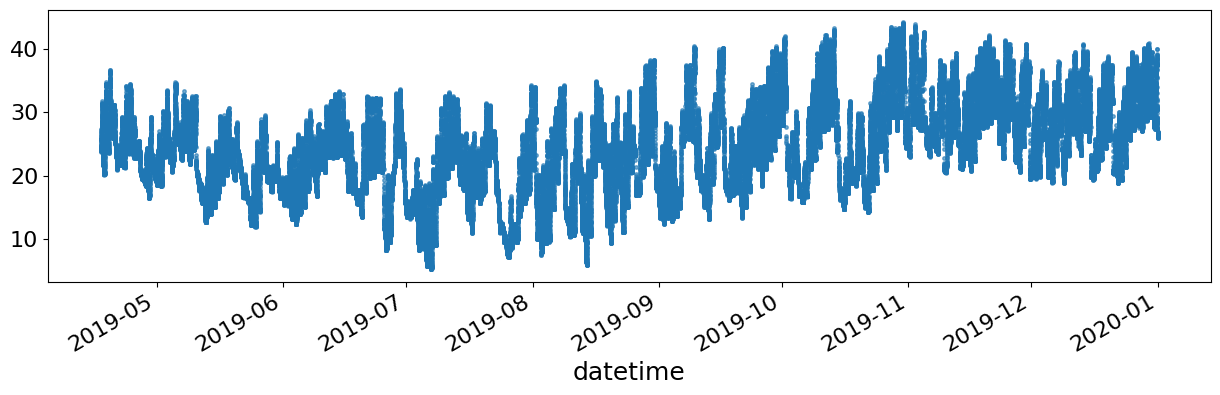

In [10]:
estaciones['Temperatura'].plot( marker='.',markersize=5, linestyle='None', alpha=0.6, figsize=(15, 4))

In [11]:
# Eliminar duplicados en la columna datetime
estaciones = estaciones.drop_duplicates(subset='datetime')

# Luego hacer el resampling
temperatura_r = estaciones['Temperatura'].resample('h').interpolate(method='spline', order=2)


<ipython-input-12-f79421cc9629>:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  estaciones['datetime'] = pd.to_datetime(estaciones['fecha'] + " " + estaciones['hora'])


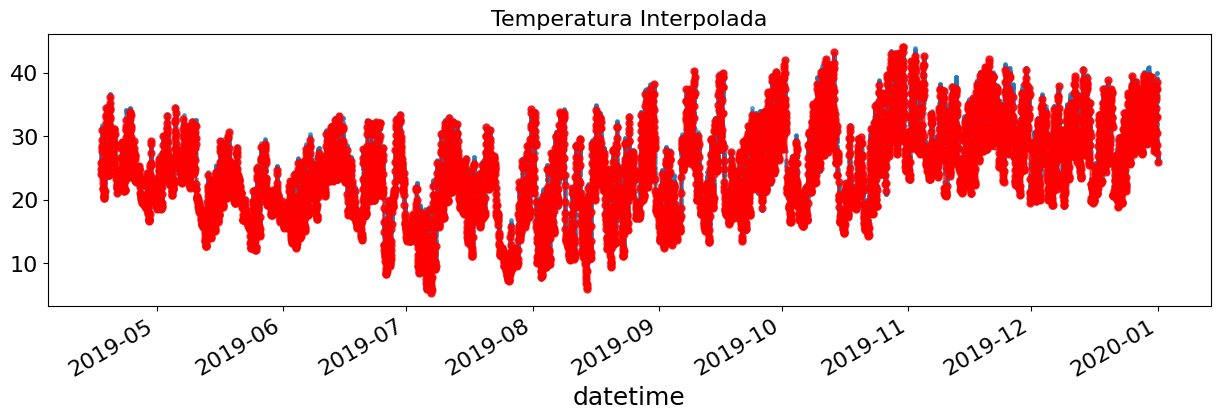

In [12]:
# Cargar los datos del CSV
estaciones = pd.read_csv('Estacion2_2019.csv', names=[ 'ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura', 'Humedad', 'Presión', 'Batería'], sep=';')

# Crear una nueva columna 'datetime' combinando 'fecha' y 'hora'
estaciones['datetime'] = pd.to_datetime(estaciones['fecha'] + " " + estaciones['hora'])

# Eliminar duplicados en la columna datetime
estaciones = estaciones.drop_duplicates(subset='datetime')

# Establecer la columna 'datetime' como índice
estaciones.set_index(["datetime"], drop=False, inplace=True)

# Graficar la columna 'Temperatura'
estaciones['Temperatura'].plot(marker='.', markersize=5, linestyle='None', alpha=0.6, figsize=(15, 4))

# Re-muestrear y realizar interpolación
temperatura_r = estaciones['Temperatura'].resample('h').interpolate(method='spline', order=2)

# Visualizar el resultado interpolado
temperatura_r.plot(marker='o', markersize=5, linestyle='-', alpha=0.8, figsize=(15, 4), color='red')
plt.title('Temperatura Interpolada')
plt.show()


In [13]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.6 MB/s eta 0:00:00


Algunas pruebas

            Predicción_PM2.5
Fecha                       
2020-01-01          0.842160
2020-01-02         -1.184784
2020-01-03          0.367800
2020-01-04          0.562707
2020-01-05         -0.951238


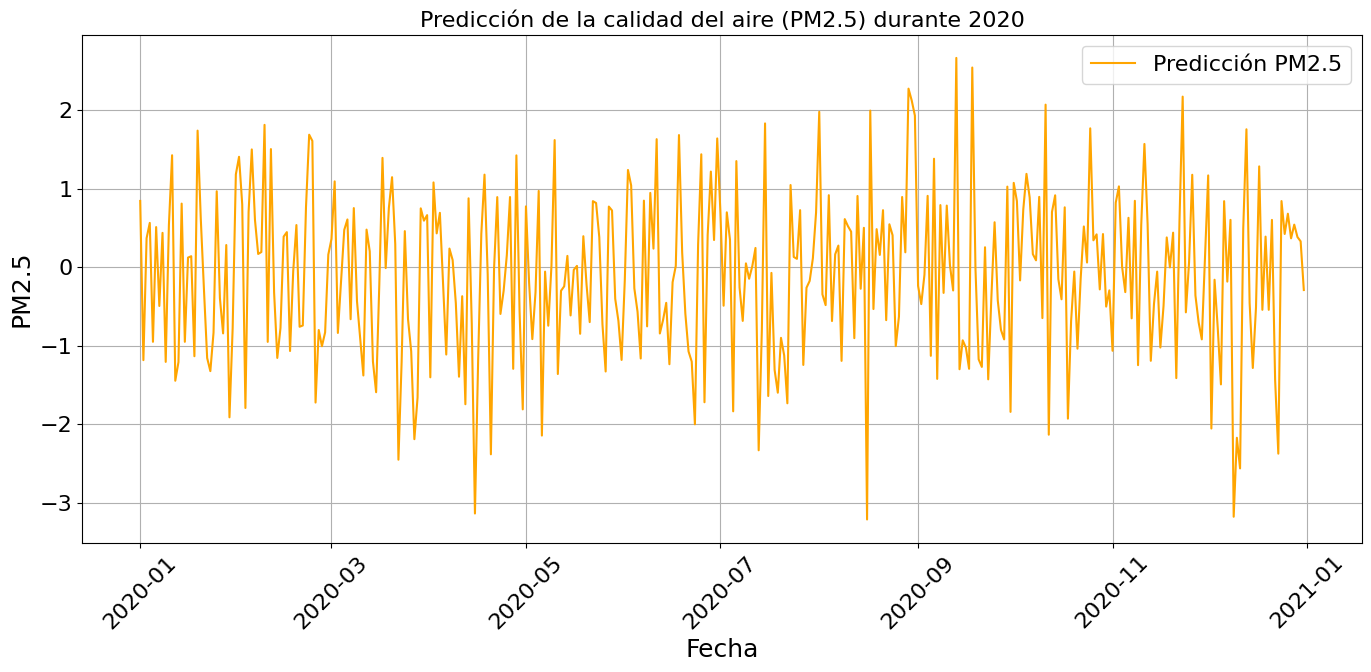

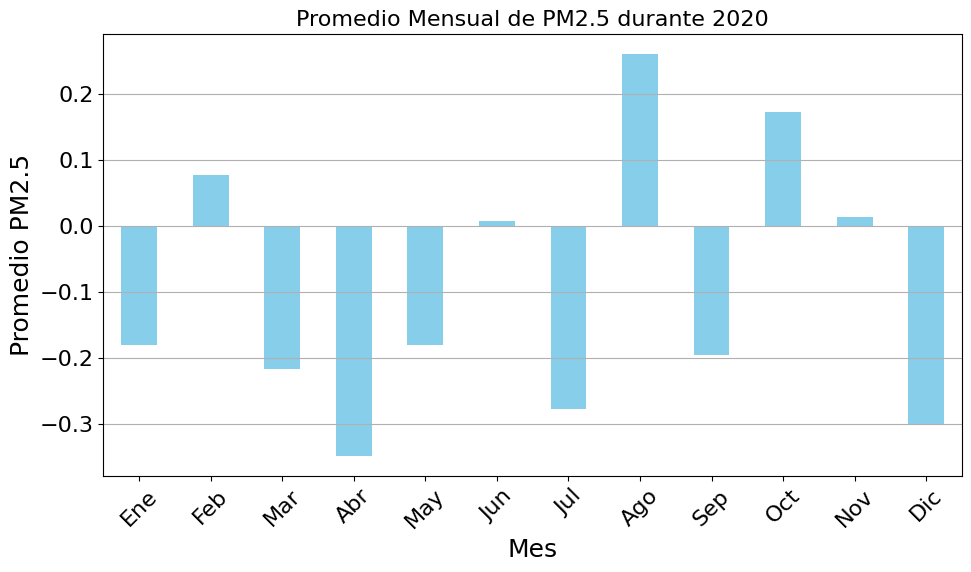

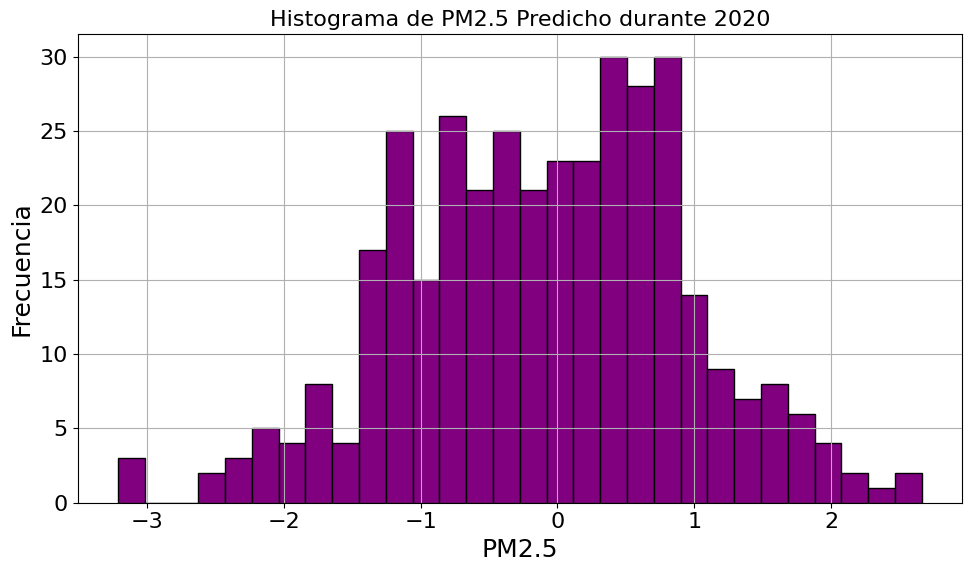

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Filtrar los datos de entrenamiento hasta diciembre de 2019
# Asegúrate de que el dataframe 'estaciones' contenga datos hasta 2019

# Filtramos los datos hasta diciembre de 2019
estaciones_train = estaciones[estaciones.index < '2020-01-01']

# Paso 2: Predecir para todo el año 2020
# Generamos un rango de fechas para todo el año 2020
fechas_2020 = pd.date_range('2020-01-01', '2020-12-31', freq='D')

# Paso 3: Crear un DataFrame con características para todo el 2020
# Suponiendo que tenemos valores como `MP1`, `MP10`, `Temperatura`, etc., para esas fechas, si no, debemos generar datos sintéticos

# Aquí generamos datos sintéticos de ejemplo para las predicciones
# Esto es solo para ilustrar; reemplaza con tus propios valores si los tienes.
future_features = pd.DataFrame({
    'MP1': np.random.randn(len(fechas_2020)),  # Generando datos sintéticos
    'MP2.5': np.random.randn(len(fechas_2020)),  # Generando datos sintéticos
    'MP10': np.random.randn(len(fechas_2020)),  # Generando datos sintéticos
    'Temperatura': np.random.randn(len(fechas_2020)),  # Generando datos sintéticos
    'Humedad': np.random.randn(len(fechas_2020)),  # Generando datos sintéticos
    'Presión': np.random.randn(len(fechas_2020)),  # Generando datos sintéticos
    'mes': fechas_2020.month,  # Mes de cada fecha (1-12)
    'día_semana': fechas_2020.dayofweek,  # Día de la semana (0=lunes, 6=domingo)
    'promedio_temp': np.random.randn(len(fechas_2020)),  # Promedio de temperatura sintético
}, index=fechas_2020)

# Paso 4: Preprocesar las características (estandarizar)
# Usamos el scaler que fue ajustado en el conjunto de entrenamiento
future_features_scaled = scaler.transform(future_features)

# Paso 5: Realizar las predicciones con el modelo entrenado
# Usamos el modelo entrenado (usando, por ejemplo, RandomForestRegressor o cualquier otro modelo de regresión)
predicciones_2020 = model.predict(future_features_scaled)

# Paso 6: Crear un DataFrame con las predicciones
predicciones_2020_df = pd.DataFrame({
    'Fecha': fechas_2020,
    'Predicción_PM2.5': predicciones_2020
})

# Establecer 'Fecha' como índice
predicciones_2020_df.set_index('Fecha', inplace=True)

# Paso 7: Guardar las predicciones en un archivo CSV
predicciones_2020_df.to_csv('predicciones_2020.csv')

# Mostrar las primeras predicciones
print(predicciones_2020_df.head())

# Paso 8: Visualización de las predicciones

# Gráfico de las predicciones de PM2.5 durante el 2020
plt.figure(figsize=(14, 7))
plt.plot(predicciones_2020_df.index, predicciones_2020_df['Predicción_PM2.5'], label='Predicción PM2.5', color='orange')
plt.title('Predicción de la calidad del aire (PM2.5) durante 2020')
plt.xlabel('Fecha')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico del promedio mensual de PM2.5 para 2020
predicciones_2020_df['Mes'] = predicciones_2020_df.index.month
monthly_avg = predicciones_2020_df.groupby('Mes')['Predicción_PM2.5'].mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Promedio Mensual de PM2.5 durante 2020')
plt.xlabel('Mes')
plt.ylabel('Promedio PM2.5')
plt.xticks(ticks=np.arange(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Histograma de las predicciones de PM2.5 para 2020
plt.figure(figsize=(10, 6))
plt.hist(predicciones_2020_df['Predicción_PM2.5'], bins=30, color='purple', edgecolor='black')
plt.title('Histograma de PM2.5 Predicho durante 2020')
plt.xlabel('PM2.5')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


CÒDIGO PARA FEBRERO 2020

In [ ]:
import pandas as pd
import numpy as np

# Paso 1: Filtrar los datos de entrenamiento hasta diciembre de 2019
# Asegúrate de que el dataframe 'estaciones' contenga datos hasta 2019

# Filtramos los datos hasta diciembre de 2019
estaciones_train = estaciones[estaciones.index < '2020-01-01']

# Paso 2: Predecir para el mes de febrero de 2020
# Generamos un rango de fechas para febrero de 2020
febrero_2020_dates = pd.date_range('2020-02-01', '2020-02-29', freq='D')

# Paso 3: Crear un DataFrame con características para esas fechas
# Suponiendo que tenemos valores como `MP1`, `MP10`, `Temperatura`, etc., para esas fechas, si no, debemos generar datos sintéticos

# Aquí generamos datos sintéticos de ejemplo para las predicciones
# Esto es solo para ilustrar; reemplaza con tus propios valores si los tienes.
future_features = pd.DataFrame({
    'MP1': np.random.randn(len(febrero_2020_dates)),  # Generando datos sintéticos
    'MP2.5': np.random.randn(len(febrero_2020_dates)),  # Generando datos sintéticos
    'MP10': np.random.randn(len(febrero_2020_dates)),  # Generando datos sintéticos
    'Temperatura': np.random.randn(len(febrero_2020_dates)),  # Generando datos sintéticos
    'Humedad': np.random.randn(len(febrero_2020_dates)),  # Generando datos sintéticos
    'Presión': np.random.randn(len(febrero_2020_dates)),  # Generando datos sintéticos
    'mes': 2,  # Mes de febrero
    'día_semana': febrero_2020_dates.dayofweek,  # Día de la semana (0=lunes, 6=domingo)
    'promedio_temp': np.random.randn(len(febrero_2020_dates)),  # Promedio de temperatura sintético
}, index=febrero_2020_dates)

# Paso 4: Preprocesar las características (estandarizar)
# Usamos el scaler que fue ajustado en el conjunto de entrenamiento
future_features_scaled = scaler.transform(future_features)

# Paso 5: Realizar las predicciones con el modelo entrenado
# Usamos el modelo entrenado (usando, por ejemplo, RandomForestRegressor o cualquier otro modelo de regresión)
predicciones_febrero = model.predict(future_features_scaled)

# Paso 6: Crear un DataFrame con las predicciones
predicciones_febrero_df = pd.DataFrame({
    'Fecha': febrero_2020_dates,
    'Predicción_PM2.5': predicciones_febrero
})

# Establecer 'Fecha' como índice
predicciones_febrero_df.set_index('Fecha', inplace=True)

# Paso 7: Guardar las predicciones en un archivo CSV
predicciones_febrero_df.to_csv('predicciones_febrero_2020.csv')

# Mostrar las primeras predicciones
print(predicciones_febrero_df.head())


            Predicción_PM2.5
Fecha                       
2020-02-01         -0.458190
2020-02-02          1.106556
2020-02-03         -0.631271
2020-02-04          0.120082
2020-02-05          1.730845


**final**

<ipython-input-17-830c0f0ce294>:28: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  estaciones['datetime'] = pd.to_datetime(estaciones['fecha'] + " " + estaciones['hora'])


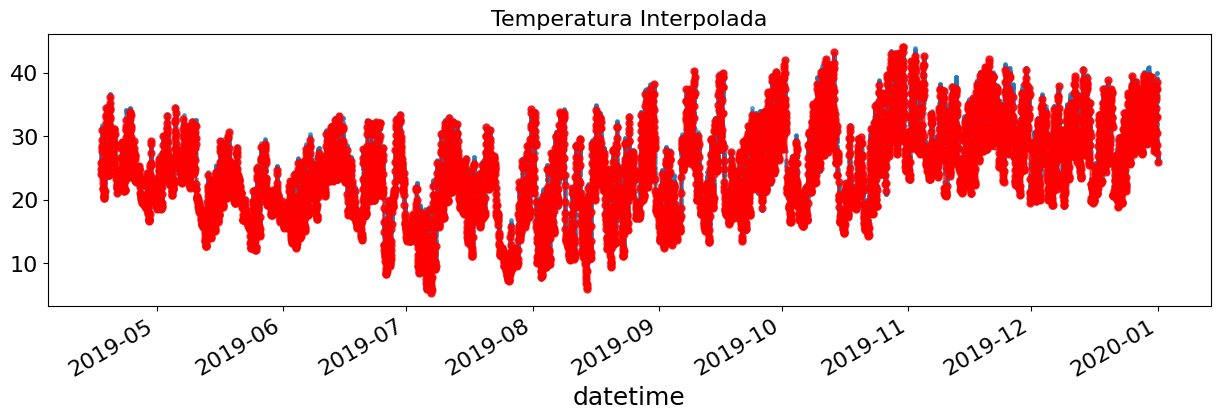

RMSE en conjunto de validación: 0.42565479757804137
Mejores parámetros de GridSearch: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
RMSE después de GridSearch: 0.4310957406319107


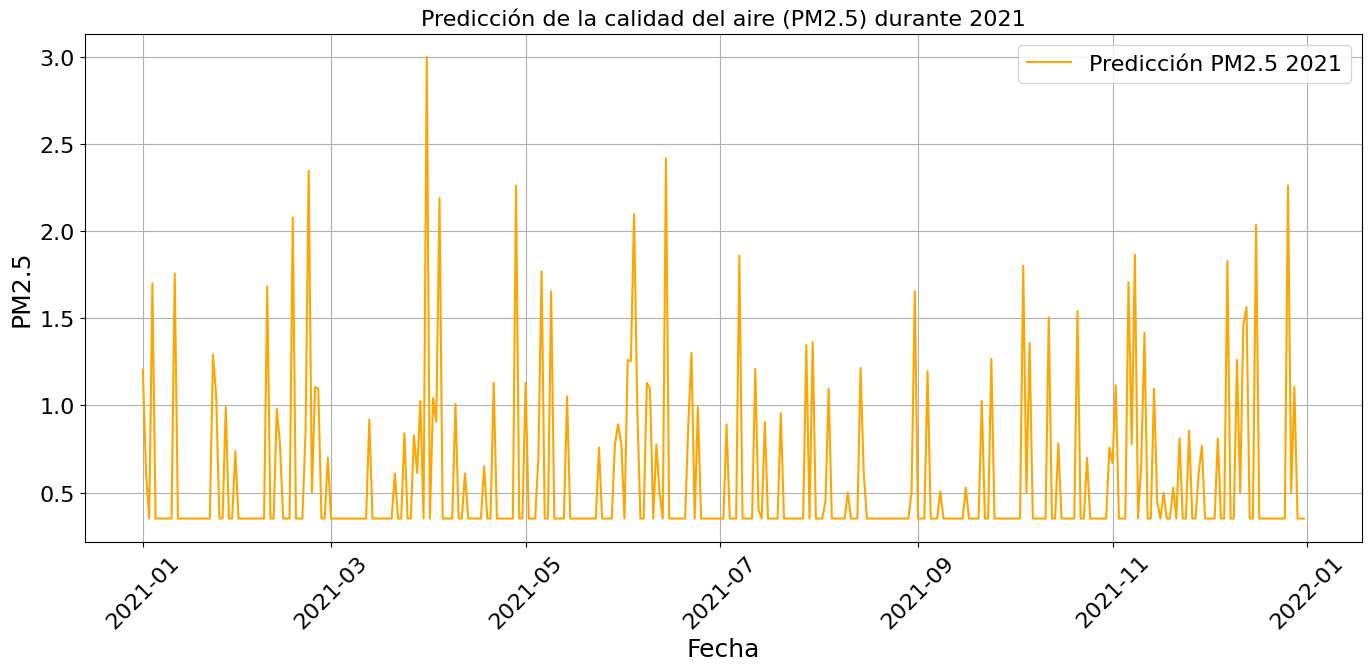

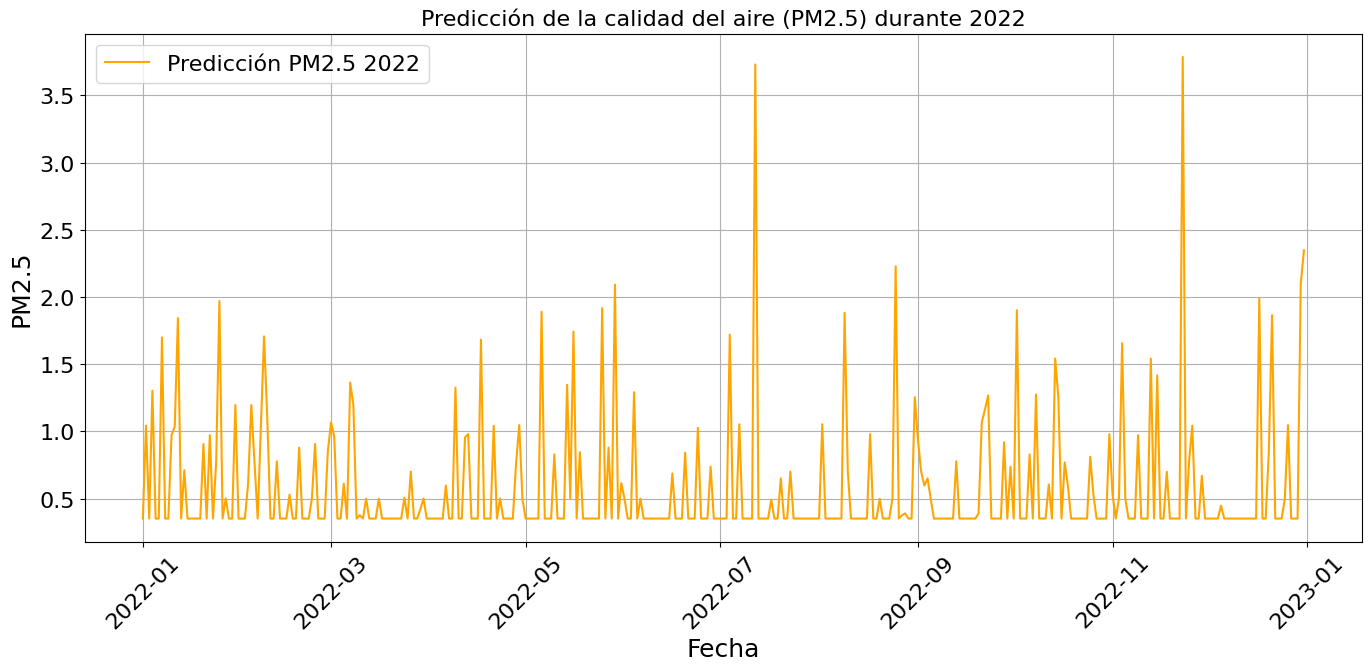

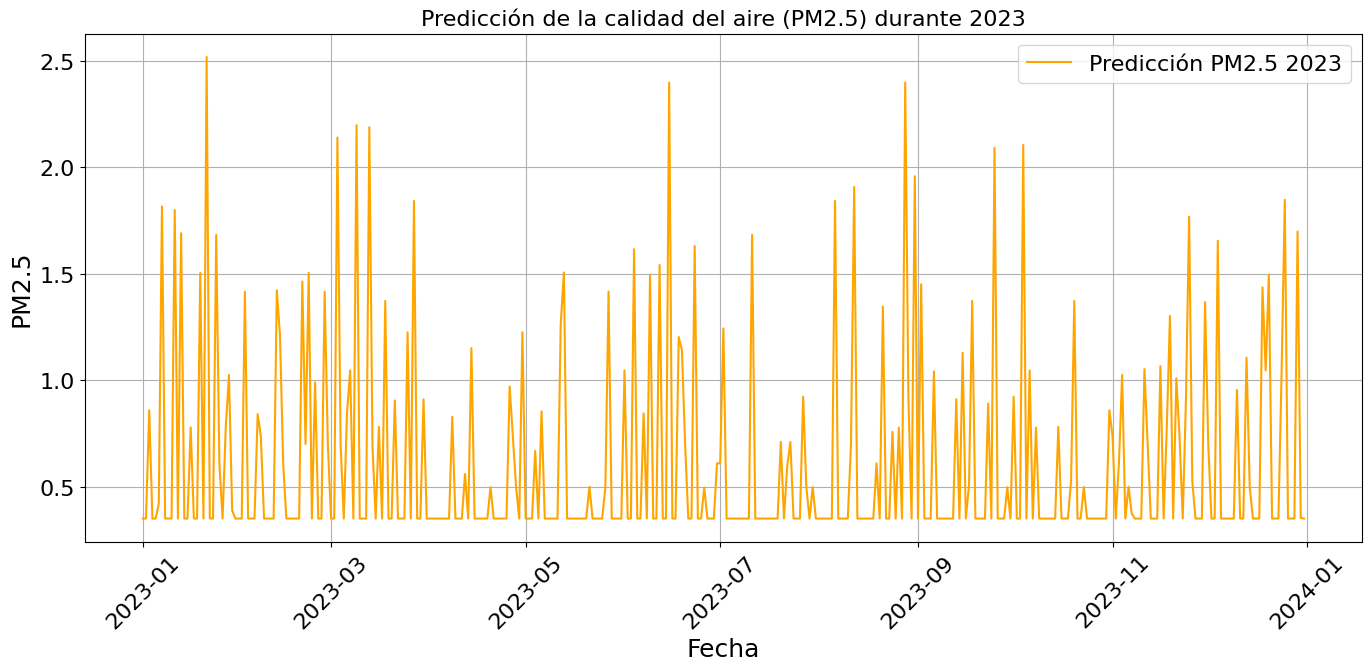

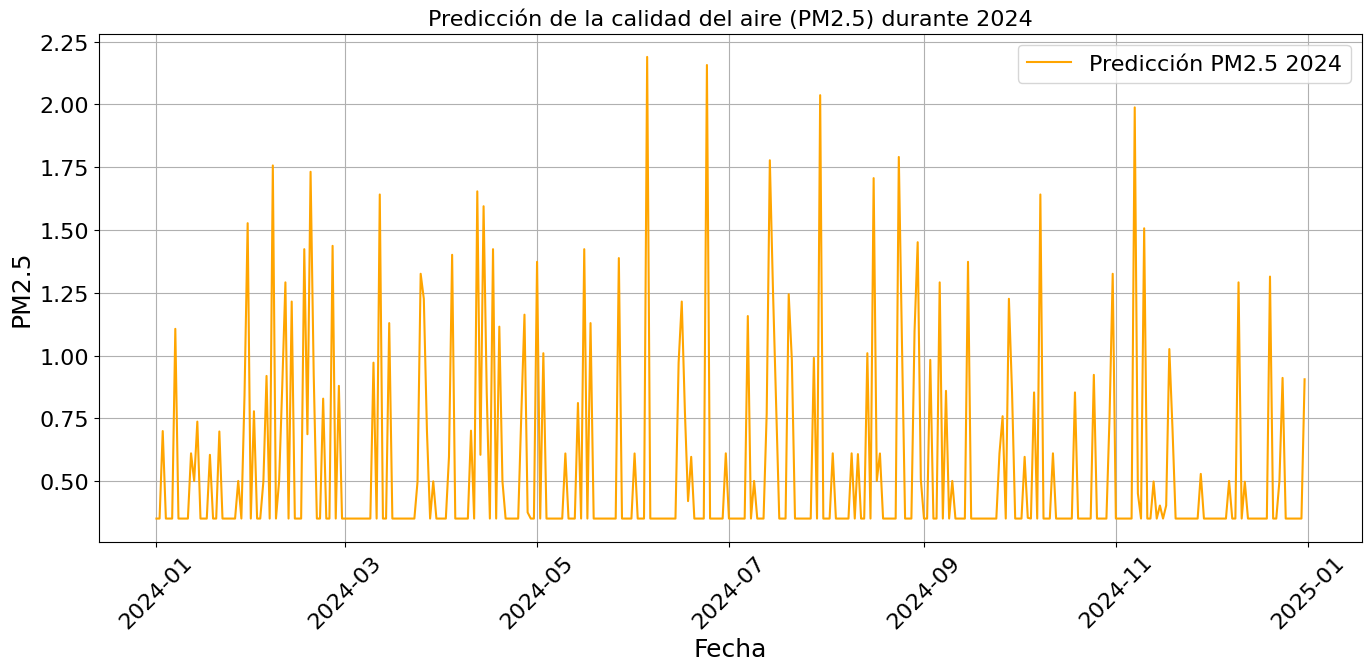

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy import integrate
import statsmodels.formula.api as sm

# Establecer parámetros de estilo para las gráficas
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controles los tamaños de texto predeterminados
plt.rc('axes', titlesize=SMALL_SIZE)     # tamaño de fuente del título de los ejes
plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamaño de fuente de las etiquetas de los ejes
plt.rc('xtick', labelsize=SMALL_SIZE)    # tamaño de fuente de las etiquetas de los ticks en el eje x
plt.rc('ytick', labelsize=SMALL_SIZE)    # tamaño de fuente de las etiquetas de los ticks en el eje y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamaño de la leyenda
plt.rc('figure', titlesize=BIGGER_SIZE)  # tamaño de fuente del título de la figura

# Cargar los datos
estaciones = pd.read_csv('Estacion2_2019.csv', names=['ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura', 'Humedad', 'Presión', 'Batería'], sep=';')
estaciones['datetime'] = pd.to_datetime(estaciones['fecha'] + " " + estaciones['hora'])

# Eliminar duplicados
estaciones = estaciones.drop_duplicates(subset='datetime')

# Establecer la columna 'datetime' como índice
estaciones.set_index(["datetime"], drop=False, inplace=True)

# Graficar la columna 'Temperatura' para ver los datos originales
estaciones['Temperatura'].plot(marker='.', markersize=5, linestyle='None', alpha=0.6, figsize=(15, 4))

# Re-muestrear y realizar interpolación (interpolación spline)
temperatura_r = estaciones['Temperatura'].resample('h').interpolate(method='spline', order=2)

# Visualizar el resultado interpolado
temperatura_r.plot(marker='o', markersize=5, linestyle='-', alpha=0.8, figsize=(15, 4), color='red')
plt.title('Temperatura Interpolada')
plt.show()

# Generar características adicionales
estaciones['mes'] = estaciones.index.month  # Mes del año
estaciones['día_semana'] = estaciones.index.dayofweek  # Día de la semana (0=lunes, 6=domingo)
estaciones['promedio_temp'] = estaciones['Temperatura'].rolling(window=24).mean()  # Promedio de temperatura en las últimas 24 horas

# Filtrar los datos de entrenamiento hasta diciembre de 2019
estaciones_train = estaciones[estaciones.index < '2020-01-01']

# Seleccionar características y objetivo para el modelo
X = estaciones_train[['MP1', 'MP2.5', 'MP10', 'Temperatura', 'Humedad', 'Presión', 'mes', 'día_semana', 'promedio_temp']]
y = estaciones_train['MP2.5']  # El objetivo es predecir PM2.5

# Dividir los datos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Crear un modelo base (RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajustar el modelo al conjunto de entrenamiento
model.fit(X_train_scaled, y_train)

# Evaluación preliminar en el conjunto de validación
y_pred = model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE en conjunto de validación: {rmse}")

# Optimización de hiperparámetros con GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros encontrados por GridSearchCV
print("Mejores parámetros de GridSearch:", grid_search.best_params_)

# Ajustar el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Evaluar nuevamente con el modelo ajustado
y_pred_best = best_model.predict(X_val_scaled)
rmse_best = np.sqrt(mean_squared_error(y_val, y_pred_best))
print(f"RMSE después de GridSearch: {rmse_best}")

# Función para predecir un año completo
def predecir_anio(year, model, scaler):
    fechas = pd.date_range(f'{year}-01-01', f'{year}-12-31', freq='D')

    # Crear un DataFrame con características para todo el año
    future_features = pd.DataFrame({
        'MP1': np.random.randn(len(fechas)),  # Generando datos sintéticos
        'MP2.5': np.random.randn(len(fechas)),  # Generando datos sintéticos
        'MP10': np.random.randn(len(fechas)),  # Generando datos sintéticos
        'Temperatura': np.random.randn(len(fechas)),  # Generando datos sintéticos
        'Humedad': np.random.randn(len(fechas)),  # Generando datos sintéticos
        'Presión': np.random.randn(len(fechas)),  # Generando datos sintéticos
        'mes': fechas.month,  # Mes de cada fecha (1-12)
        'día_semana': fechas.dayofweek,  # Día de la semana (0=lunes, 6=domingo)
        'promedio_temp': np.random.randn(len(fechas)),  # Promedio de temperatura sintético
    }, index=fechas)

    # Preprocesar las características (escala)
    future_features_scaled = scaler.transform(future_features)

    # Realizar las predicciones con el modelo entrenado
    predicciones = model.predict(future_features_scaled)

    # Crear un DataFrame con las predicciones
    predicciones_df = pd.DataFrame({
        'Fecha': fechas,
        'Predicción_PM2.5': predicciones
    })

    # Establecer 'Fecha' como índice
    predicciones_df.set_index('Fecha', inplace=True)

    # Guardar las predicciones en un archivo CSV
    predicciones_df.to_csv(f'predicciones_{year}.csv')

    return predicciones_df

# Lista de años para realizar las predicciones
years = [2021, 2022, 2023, 2024]

# Diccionario para almacenar los resultados de cada año
predicciones_por_ano = {}

# Iterar sobre cada año, realizar la predicción y guardarlo
for year in years:
    predicciones_por_ano[year] = predecir_anio(year, best_model, scaler)

    # Crear un gráfico para cada año
    plt.figure(figsize=(14, 7))
    plt.plot(predicciones_por_ano[year].index, predicciones_por_ano[year]['Predicción_PM2.5'], label=f'Predicción PM2.5 {year}', color='orange')
    plt.title(f'Predicción de la calidad del aire (PM2.5) durante {year}')
    plt.xlabel('Fecha')
    plt.ylabel('PM2.5')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Guardar el gráfico como una imagen
    plt.savefig(f'prediccion_PM2.5_{year}.png')

    # Mostrar el gráfico
    plt.show()



Año 2019

<ipython-input-26-3510fa94c536>:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  estaciones['datetime'] = pd.to_datetime(estaciones['fecha'] + " " + estaciones['hora'])


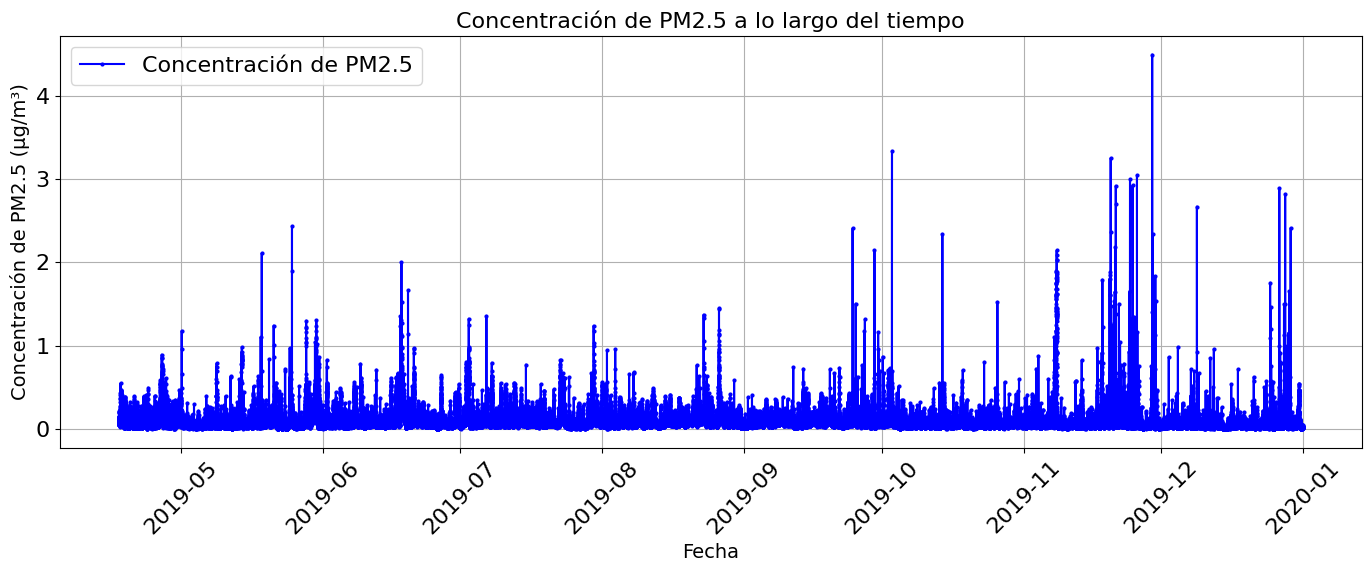

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar los datos
estaciones = pd.read_csv('Estacion2_2019.csv', names=['ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura', 'Humedad', 'Presión', 'Batería'], sep=';')

# Convertir las columnas 'fecha' y 'hora' a formato datetime
estaciones['datetime'] = pd.to_datetime(estaciones['fecha'] + " " + estaciones['hora'])

# Establecer la columna 'datetime' como índice
estaciones.set_index("datetime", inplace=True)

# valores de 'MP2.5'
estaciones['MP2.5'] = estaciones['MP2.5'] / 100

# Graficar la columna 'MP2.5' dividida entre 100 en función del tiempo
plt.figure(figsize=(14, 6))
plt.plot(estaciones.index, estaciones['MP2.5'], label='Concentración de PM2.5', color='b', linestyle='-', marker='o', markersize=2)
plt.title('Concentración de PM2.5 a lo largo del tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Concentración de PM2.5 (µg/m³)', fontsize=14)  # No menciona el cambio de escala
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


Valores predichos

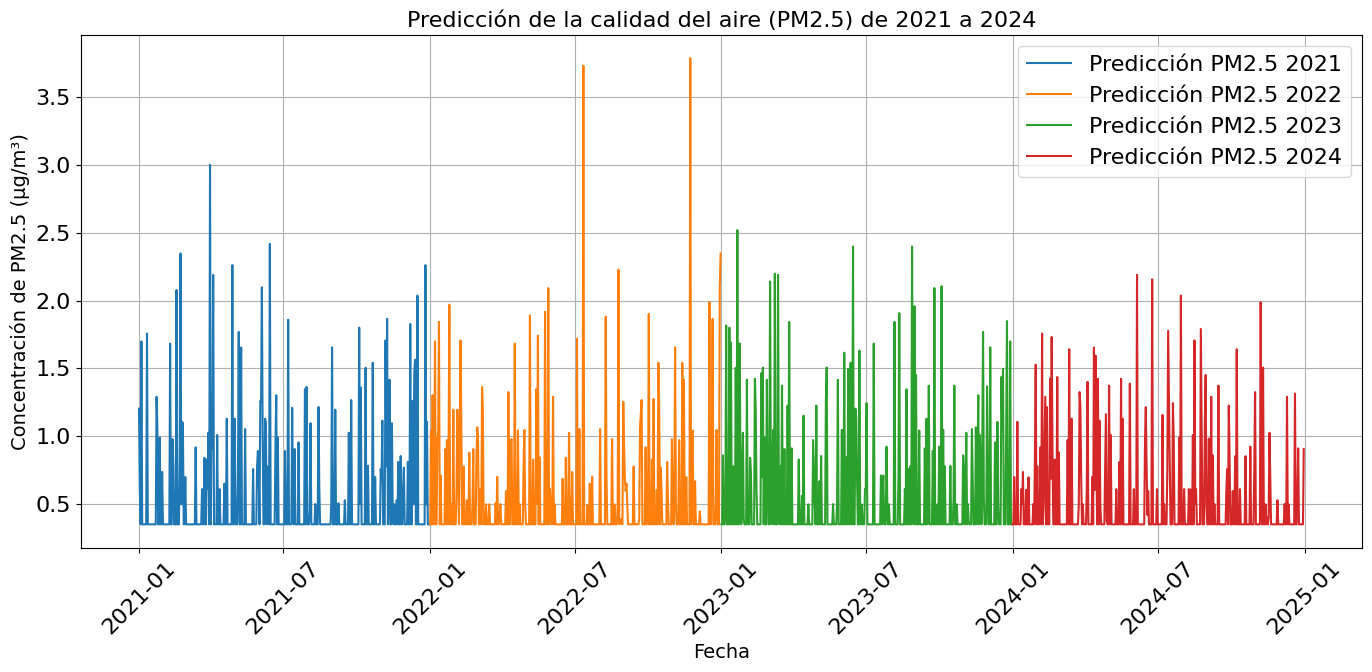

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Asumimos que 'predicciones_por_ano' es un diccionario con las predicciones para los años 2021-2024
# Cada valor en 'predicciones_por_ano' es un DataFrame con las predicciones para un año determinado.

# Inicializar una lista para almacenar todas las predicciones
all_predictions = []

# Iterar sobre los años 2021 a 2024
for year in range(2021, 2025):
    # Obtener las predicciones para el año
    predicciones_df = predicciones_por_ano[year]

    # Añadir una columna con el año para diferenciarlas en el gráfico
    predicciones_df['Año'] = year

    # Añadir las predicciones del año al listado de todas las predicciones
    all_predictions.append(predicciones_df)

# Concatenar todas las predicciones en un solo DataFrame
predicciones_totales = pd.concat(all_predictions)

# Graficar las predicciones de PM2.5 de 2021 a 2024 en función del tiempo
plt.figure(figsize=(14, 7))

# Usar un color distinto por año
for year in range(2021, 2025):
    data_year = predicciones_totales[predicciones_totales['Año'] == year]
    plt.plot(data_year.index, data_year['Predicción_PM2.5'], label=f'Predicción PM2.5 {year}')

# Añadir detalles al gráfico
plt.title('Predicción de la calidad del aire (PM2.5) de 2021 a 2024', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Concentración de PM2.5 (µg/m³)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Para ver el error

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy import integrate
import statsmodels.formula.api as sm

# Establecer parámetros de estilo para las gráficas
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controles los tamaños de texto predeterminados
plt.rc('axes', titlesize=SMALL_SIZE)     # tamaño de fuente del título de los ejes
plt.rc('axes', labelsize=MEDIUM_SIZE)    # tamaño de fuente de las etiquetas de los ejes
plt.rc('xtick', labelsize=SMALL_SIZE)    # tamaño de fuente de las etiquetas de los ticks en el eje x
plt.rc('ytick', labelsize=SMALL_SIZE)    # tamaño de fuente de las etiquetas de los ticks en el eje y
plt.rc('legend', fontsize=SMALL_SIZE)    # tamaño de la leyenda
plt.rc('figure', titlesize=BIGGER_SIZE)  # tamaño de fuente del título de la figura

# Cargar los datos
estaciones = pd.read_csv('Estacion2_2019.csv', names=['ID', 'fecha', 'hora', 'MP1', 'MP2.5', 'MP10', 'Temperatura', 'Humedad', 'Presión', 'Batería'], sep=';')
estaciones['datetime'] = pd.to_datetime(estaciones['fecha'] + " " + estaciones['hora'])

# Eliminar duplicados
estaciones = estaciones.drop_duplicates(subset='datetime')

# Establecer la columna 'datetime' como índice
estaciones.set_index(["datetime"], drop=False, inplace=True)

# Generar características adicionales
estaciones['mes'] = estaciones.index.month  # Mes del año
estaciones['día_semana'] = estaciones.index.dayofweek  # Día de la semana (0=lunes, 6=domingo)
estaciones['promedio_temp'] = estaciones['Temperatura'].rolling(window=24).mean()  # Promedio de temperatura en las últimas 24 horas

# Filtrar los datos de entrenamiento hasta diciembre de 2019
estaciones_train = estaciones[estaciones.index < '2020-01-01']

# Seleccionar características y objetivo para el modelo
X = estaciones_train[['MP1', 'MP2.5', 'MP10', 'Temperatura', 'Humedad', 'Presión', 'mes', 'día_semana', 'promedio_temp']]
y = estaciones_train['MP2.5']  # El objetivo es predecir PM2.5

# Dividir los datos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Crear un modelo base (RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Evaluación preliminar en el conjunto de validación
y_pred = model.fit(X_train_scaled, y_train).predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE en conjunto de validación: {rmse}")

# Curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calcular el error cuadrático medio para cada conjunto
train_errors = -train_scores.mean(axis=1)  # Negamos ya que el scoring devuelve valores negativos
val_errors = -val_scores.mean(axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label="Error en Entrenamiento", color='blue', marker='o')
plt.plot(train_sizes, val_errors, label="Error en Validación", color='red', marker='o')
plt.title("Curva de Aprendizaje - Random Forest")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error cuadrático medio (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-28-3f01513860e1>:28: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  estaciones['datetime'] = pd.to_datetime(estaciones['fecha'] + " " + estaciones['hora'])
<ipython-input-28-3f01513860e1>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estaciones['mes'] = estaciones.index.month  # Mes del año
<ipython-input-28-3f01513860e1>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

RMSE en conjunto de validación: 0.42565479757804137


KeyboardInterrupt: 